In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager as ftm
import os
#import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [5]:
#import dataframe and visualize

path = 'normalized.pickle'
df = pd.read_pickle(os.path.join(r'C:\Users\Teresa\Desktop\TESE\Textural Analysis', path))

df

,Area,Image,Mean Green,Mean Intensity,Mean Red,Normalized Mean Green,Normalized Mean Red,Normalized Total Green,Normalized Total Red,Nucleus Patch,...,Equivalent Diameter,Major Axis Length,Minor Axis Length,Max Intensity,Min Intensity,Orientation,Perimeter,Solidity,Entropy,Circularity
0,4155,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,12.619976,125.657280,46.411793,0.262386,0.964963,0.262386,0.964963,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,72.734519,93.715394,56.642633,255,44,0.884948,248.350288,0.983199,5.579251,0.846548
3,4760,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,29.452311,120.828992,37.138025,0.621369,0.783518,0.621369,0.783518,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,77.849985,93.066080,65.323570,255,40,1.412099,258.894444,0.992287,6.150013,0.892424
4,5014,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,6.779418,114.041284,86.455325,0.078175,0.996940,0.078175,0.996940,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,79.900082,88.914160,72.074866,255,46,-1.500195,261.722871,0.990518,5.924569,0.919837
6,5503,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,10.632564,106.558968,73.093949,0.143949,0.989585,0.143949,0.989585,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,83.705658,89.324967,78.566344,255,39,-0.744969,271.764502,0.993142,5.826534,0.936319
7,5800,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,7.822759,116.757931,120.578621,0.064741,0.997902,0.064741,0.997902,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,85.934797,88.987739,83.083881,255,48,-1.071380,279.764502,0.992131,5.580421,0.931221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,5145,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,77.881633,152.714480,4.357629,0.998438,0.055865,0.998438,0.055865,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,80.937120,91.817259,71.901276,255,46,-1.451276,273.764502,0.985632,5.352308,0.862663
8614,4802,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,52.264681,136.686381,2.954602,0.998406,0.056441,0.998406,0.056441,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,78.192687,84.966272,71.992936,255,57,0.596904,258.107648,0.986239,5.435626,0.905796
8615,3566,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,17.987942,127.823331,39.335109,0.415878,0.909420,0.415878,0.909420,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,67.382284,77.833736,58.528837,255,52,-1.448471,228.409163,0.978864,5.656561,0.858943
8617,4908,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,51.481866,152.560921,7.560106,0.989389,0.145292,0.989389,0.145292,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,79.050994,79.792635,78.405947,255,59,-1.557158,261.622366,0.985542,6.055117,0.901083


In [70]:
#data included in dataframe
columns = list(df.columns)

#select features of interest
features = ['Area', 'Mean Intensity', 'Mean', 'Std', 'Variance', 'Skewness', 'Kurtosis', 'Invariant Uniformity', 
            'GLCM Invariant Entropy', 'Invariant Correlation', 'Invariant Dissimilarity','Invariant Contrast', 
            'Invariant Homogeneity', 'Invariant Energy', 'BB Area','Centroid Divergence','Eccentricity', 
            'Equivalent Diameter', 'Major Axis Length', 'Minor Axis Length', 'Max Intensity', 'Min Intensity', 
            'Perimeter', 'Solidity', 'Entropy', 'Circularity']

In [71]:
#standartizing data

# Separating out the features
feat_col = df.loc[:, features].values
# Separating out the target
target_col = df.loc[:,['Automatic Label']].values
# Standardizing the features
std_feat = StandardScaler().fit_transform(feat_col)


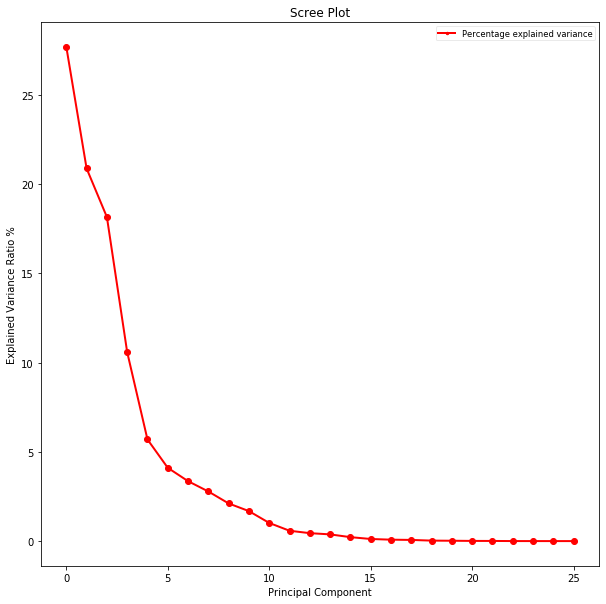

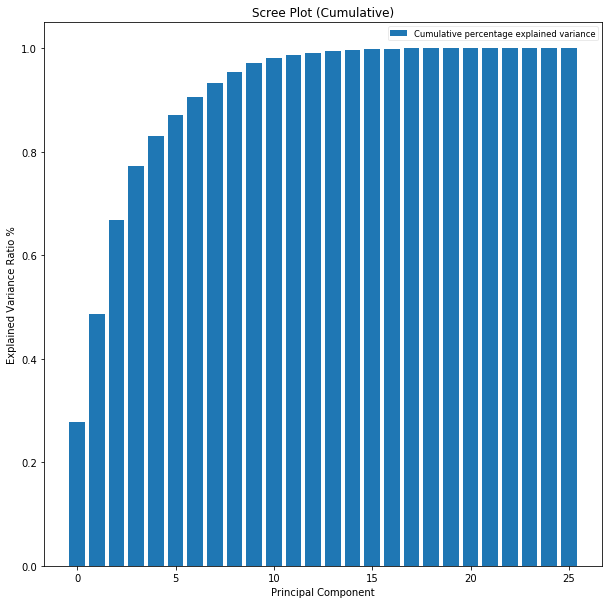

In [84]:
#performing PCA

pca = PCA() #number of components - n_components == min(n_samples, n_features)

pca.fit_transform(std_feat)


#getting some info
components = pca.components_
exp_var = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
cum_exp_var_ratio = np.cumsum(exp_var_ratio)

#plotting screeplot

#------plot1------
plt.rcParams['figure.figsize'] = (10,10)
plt.figure()

plt.plot( exp_var_ratio*100, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio %')

leg = plt.legend(['Percentage explained variance'], loc='best', borderpad=0.3, 
                 shadow=False, prop = ftm.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
#leg.draggable(state=True)  #makes it movable if necessary
plt.show()

#------plot2------
plt.rcParams['figure.figsize'] = (10,10)
plt.figure()

plt.bar(np.arange(len(components)),cum_exp_var_ratio)
plt.title('Scree Plot (Cumulative)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio %')

leg = plt.legend(['Cumulative percentage explained variance'], loc='best', borderpad=0.3, 
                 shadow=False, prop = ftm.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
#leg.draggable(state=True)  #makes it movable if necessary
plt.show()



In [90]:
#further analysing data

#see how many components explain 95% of data variation
no_comp = next(x for x, val in enumerate(cum_exp_var_ratio) 
                                  if val > 0.95)

#understand to which characteristics the PC may belong

indexes = 1 + np.arange(no_comp)

#datafram with only PCs of interest
#pc_var = pd.DataFrame(components[0:no_comp,:] ,columns=features,index = indexes)

#complete df
pc_var = pd.DataFrame(components ,columns=features,index = 1 + np.arange(len(components)))

pc_var

,Area,Mean Intensity,Mean,Std,Variance,Skewness,Kurtosis,Invariant Uniformity,GLCM Invariant Entropy,Invariant Correlation,...,Eccentricity,Equivalent Diameter,Major Axis Length,Minor Axis Length,Max Intensity,Min Intensity,Perimeter,Solidity,Entropy,Circularity
1,3.425642e-01,-0.032844,-0.032844,1.110296e-01,1.109613e-01,6.962044e-03,-1.523041e-02,1.887986e-01,2.248638e-01,2.800911e-01,...,-1.112467e-01,3.431946e-01,2.573633e-01,3.268755e-01,0.000000e+00,-7.995059e-02,3.060514e-01,1.222925e-01,1.787818e-01,1.185491e-01
2,1.474860e-01,0.184751,0.184751,-1.229142e-01,-1.183360e-01,-1.578222e-01,-1.076420e-01,3.235753e-01,-1.078958e-01,-1.431538e-01,...,1.484994e-01,1.444726e-01,2.405913e-01,4.678208e-02,-0.000000e+00,1.646534e-01,2.317302e-01,-2.671356e-01,-2.784936e-01,-3.144468e-01
3,2.089446e-02,-0.391121,-0.391121,-2.618724e-01,-2.602015e-01,3.806851e-01,3.927542e-01,9.603650e-02,-1.780464e-01,-6.565867e-02,...,1.135383e-01,2.115079e-02,9.491330e-02,-3.644544e-02,0.000000e+00,-1.947623e-01,4.466663e-02,-5.435476e-02,-1.939968e-01,-7.977226e-02
4,-1.418642e-01,-0.066190,-0.066190,3.655194e-01,3.658753e-01,-5.952555e-02,-8.433549e-02,1.225524e-01,1.995544e-01,1.684243e-01,...,2.480292e-01,-1.444365e-01,1.833494e-02,-2.282668e-01,0.000000e+00,-2.790119e-01,-7.964252e-02,-1.997310e-01,1.215533e-01,-2.284850e-01
5,8.820296e-02,-0.170178,-0.170178,1.835274e-01,1.869021e-01,1.285245e-02,-2.975587e-02,-6.708806e-02,-5.032851e-02,-3.623675e-01,...,-1.326007e-01,8.847468e-02,2.262453e-02,1.271498e-01,-0.000000e+00,-3.702861e-01,1.150920e-01,-7.655833e-02,-2.708754e-02,-1.004030e-01
6,4.631323e-02,0.038307,0.038307,-7.101214e-02,-7.436350e-02,-2.282204e-02,3.412044e-02,-1.375572e-01,1.182683e-01,-6.500526e-02,...,7.073395e-01,4.307877e-02,4.077539e-01,-2.635235e-01,0.000000e+00,-2.876693e-02,5.400950e-02,2.016576e-01,1.701747e-01,-7.515553e-02
7,-4.706239e-03,-0.150339,-0.150339,7.391094e-02,7.285597e-02,1.431032e-01,2.847036e-02,-1.958723e-02,2.674596e-01,-5.568960e-02,...,-8.195122e-02,-6.422043e-04,-2.872592e-02,3.129662e-02,-0.000000e+00,-2.053205e-02,1.053780e-01,-4.438519e-01,1.826580e-01,-3.175062e-01
8,-4.214744e-02,0.104853,0.104853,-3.274080e-01,-3.295259e-01,-9.427719e-02,2.213875e-01,-4.066495e-02,4.818312e-01,-5.497663e-02,...,-1.388286e-01,-4.628722e-02,-1.038164e-01,2.299796e-02,3.231174e-27,8.346377e-02,1.568591e-02,-2.421380e-01,3.630642e-01,-1.760977e-01
9,8.939496e-03,-0.022179,-0.022179,1.175480e-01,1.181495e-01,2.234225e-01,-1.425469e-01,-1.538579e-01,-3.355214e-01,1.667834e-01,...,4.518267e-02,9.843658e-03,4.232972e-02,-7.306746e-03,-0.000000e+00,5.198836e-01,9.370169e-02,-3.867174e-01,-3.991344e-02,-1.902526e-01
10,2.480889e-02,0.165614,0.165614,2.589242e-01,2.773892e-01,5.251338e-01,4.699842e-01,4.801719e-02,1.732253e-01,-1.606558e-01,...,-1.259937e-02,1.109848e-02,2.039237e-02,3.123567e-03,-0.000000e+00,3.154180e-01,4.483409e-03,2.054707e-01,4.353297e-02,2.227963e-02


In [91]:
#find which feature has maximum correlation with PC

abs_pc_var = pc_var.abs() #get absolute value of all numeric elements

max_feat = abs_pc_var.idxmax(axis=1) #max feature for all rows

pc_var['Max Feature'] = max_feat

pc_var ['Max Feature']


1        Equivalent Diameter
2       Invariant Uniformity
3                   Kurtosis
4                   Variance
5        Centroid Divergence
6               Eccentricity
7        Centroid Divergence
8     GLCM Invariant Entropy
9              Min Intensity
10                  Skewness
11                  Kurtosis
12               Circularity
13               Circularity
14      Invariant Uniformity
15                  Skewness
16         Major Axis Length
17     Invariant Correlation
18          Invariant Energy
19                   Entropy
20                 Perimeter
21                       Std
22         Minor Axis Length
23       Equivalent Diameter
24                   BB Area
25                      Mean
26             Max Intensity
Name: Max Feature, dtype: object

In [145]:
#alternatively, build list where each feature shows up only once, with respective correlation

def get_max (rowoi, df_row, max_list):
    max_feat_row = rowoi.idxmax(axis=1)
    if max_feat_row in max_list.keys():
        rowoi = rowoi.drop([max_feat_row])
        get_max(rowoi,df_row, max_list)
    else:
        max_list[max_feat_row] = df_row[max_feat_row]

    return max_list


#creates dictionary
max_feature = {}
for i in np.arange(abs_pc_var.shape[0]):
    row_oi = abs_pc_var.iloc[i]
    df_row = pc_var.iloc[i]
    get_max(row_oi,df_row, max_feature)
    

#create dataframe

data_df = list(max_feature.keys())

pc_unique = pd.DataFrame(data_df, columns = ['Features'],index = 1 + np.arange(len(components))) 
pc_unique['Max Correlation'] = list(max_feature.values())

pc_unique


,Features,Max Correlation
1,Equivalent Diameter,0.343195
2,Invariant Uniformity,0.323575
3,Kurtosis,0.392754
4,Variance,0.365875
5,Centroid Divergence,0.487098
6,Eccentricity,0.707340
7,Solidity,-0.443852
8,GLCM Invariant Entropy,0.481831
9,Min Intensity,0.519884
10,Skewness,0.525134
